# RIDGE REGRESSION ALGORITHOM

In [1]:
#importing  libraries
import pandas as pd #For reading the dataset and to perform framing functions if needed
import numpy as np  #linear algebra function
import matplotlib.pyplot as plt #for visualizing the data
import warnings
warnings.filterwarnings("ignore")

Importing the dataset I have used a simple 'plane prediction dataset' dataset.

In [3]:
 #---> Replace the path name and read the data
plane_model= pd.read_csv('C:/Users/ELCOT/Downloads/CSV Dataset/Plane Price.csv')
plane_model.head()

,Model Name,Engine Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng rate of climb,Eng out rate of climb,Takeoff over 50ft,Landing over 50ft,Empty weight lbs,Length ft/in,Wing span ft/in,Range N.M.,Price
0,100 Darter (S.L. Industries),Piston,145,104,91.0,46.0,36,450,900.0,1300.0,"2,050","1,180",25/3,37/5,370,1300000.0
1,7 CCM Champ,Piston,85,89,83.0,44.0,15,600,720.0,800.0,"1,350",820,20/7,36/1,190,1230000.0
2,100 Darter (S.L. Industries),Piston,90,90,78.0,37.0,19,650,475.0,850.0,"1,300",810,21/5,35/0,210,1600000.0
3,7 AC Champ,Piston,85,88,78.0,37.0,19,620,500.0,850.0,"1,300",800,21/5,35/0,210,1300000.0
4,100 Darter (S.L. Industries),Piston,65,83,74.0,33.0,14,370,632.0,885.0,"1,220",740,21/5,35/0,175,1250000.0


In [4]:
plane_model.tail()

,Model Name,Engine Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng rate of climb,Eng out rate of climb,Takeoff over 50ft,Landing over 50ft,Empty weight lbs,Length ft/in,Wing span ft/in,Range N.M.,Price
512,500 A,Propjet,1000,351,334.0,NaN,3819,"3,242",1930.0,2280.0,"12,050","7,856",43/5,47/8,"1,879",4100000.0
513,100 Darter (S.L. Industries),Propjet,720,312,288.0,89.0,578,"2,380",2280.0,3043.0,"11,200","6,837",43/5,47/8,"1,722",3584000.0
514,520,Propjet,720,290,275.0,87.0,390,"2,236",3230.0,3017.0,"11,200","6,389",43/5,47/8,"1,515",3200000.0
515,2180,Propjet,620,275,270.0,77.0,382,"1,750",2940.0,2446.0,"9,474","5,164",36/8,42/8,"1,336",3240000.0
516,2150A Kachina,Propjet,620,283,269.0,75.0,382,"2,710",1980.0,2480.0,"9,000","5,018",34/8,42/8,"1,444",3160000.0


In [5]:
plane_model.isnull().sum()

Model Name                  0
Engine Type                 0
HP or lbs thr ea engine     0
Max speed Knots            20
Rcmnd cruise Knots         10
Stall Knots dirty          15
Fuel gal/lbs                0
All eng rate of climb       4
Eng out rate of climb      26
Takeoff over 50ft          25
Landing over 50ft           0
Empty weight lbs            1
Length ft/in                0
Wing span ft/in             0
Range N.M.                 18
Price                      10
dtype: int64

In [6]:
plane_model.nunique()

Model Name                 284
Engine Type                  4
HP or lbs thr ea engine    117
Max speed Knots            209
Rcmnd cruise Knots         188
Stall Knots dirty           69
Fuel gal/lbs               173
All eng rate of climb      264
Eng out rate of climb      277
Takeoff over 50ft          241
Landing over 50ft          213
Empty weight lbs           428
Length ft/in               183
Wing span ft/in            136
Range N.M.                 299
Price                      177
dtype: int64

find the best regression using pairplot

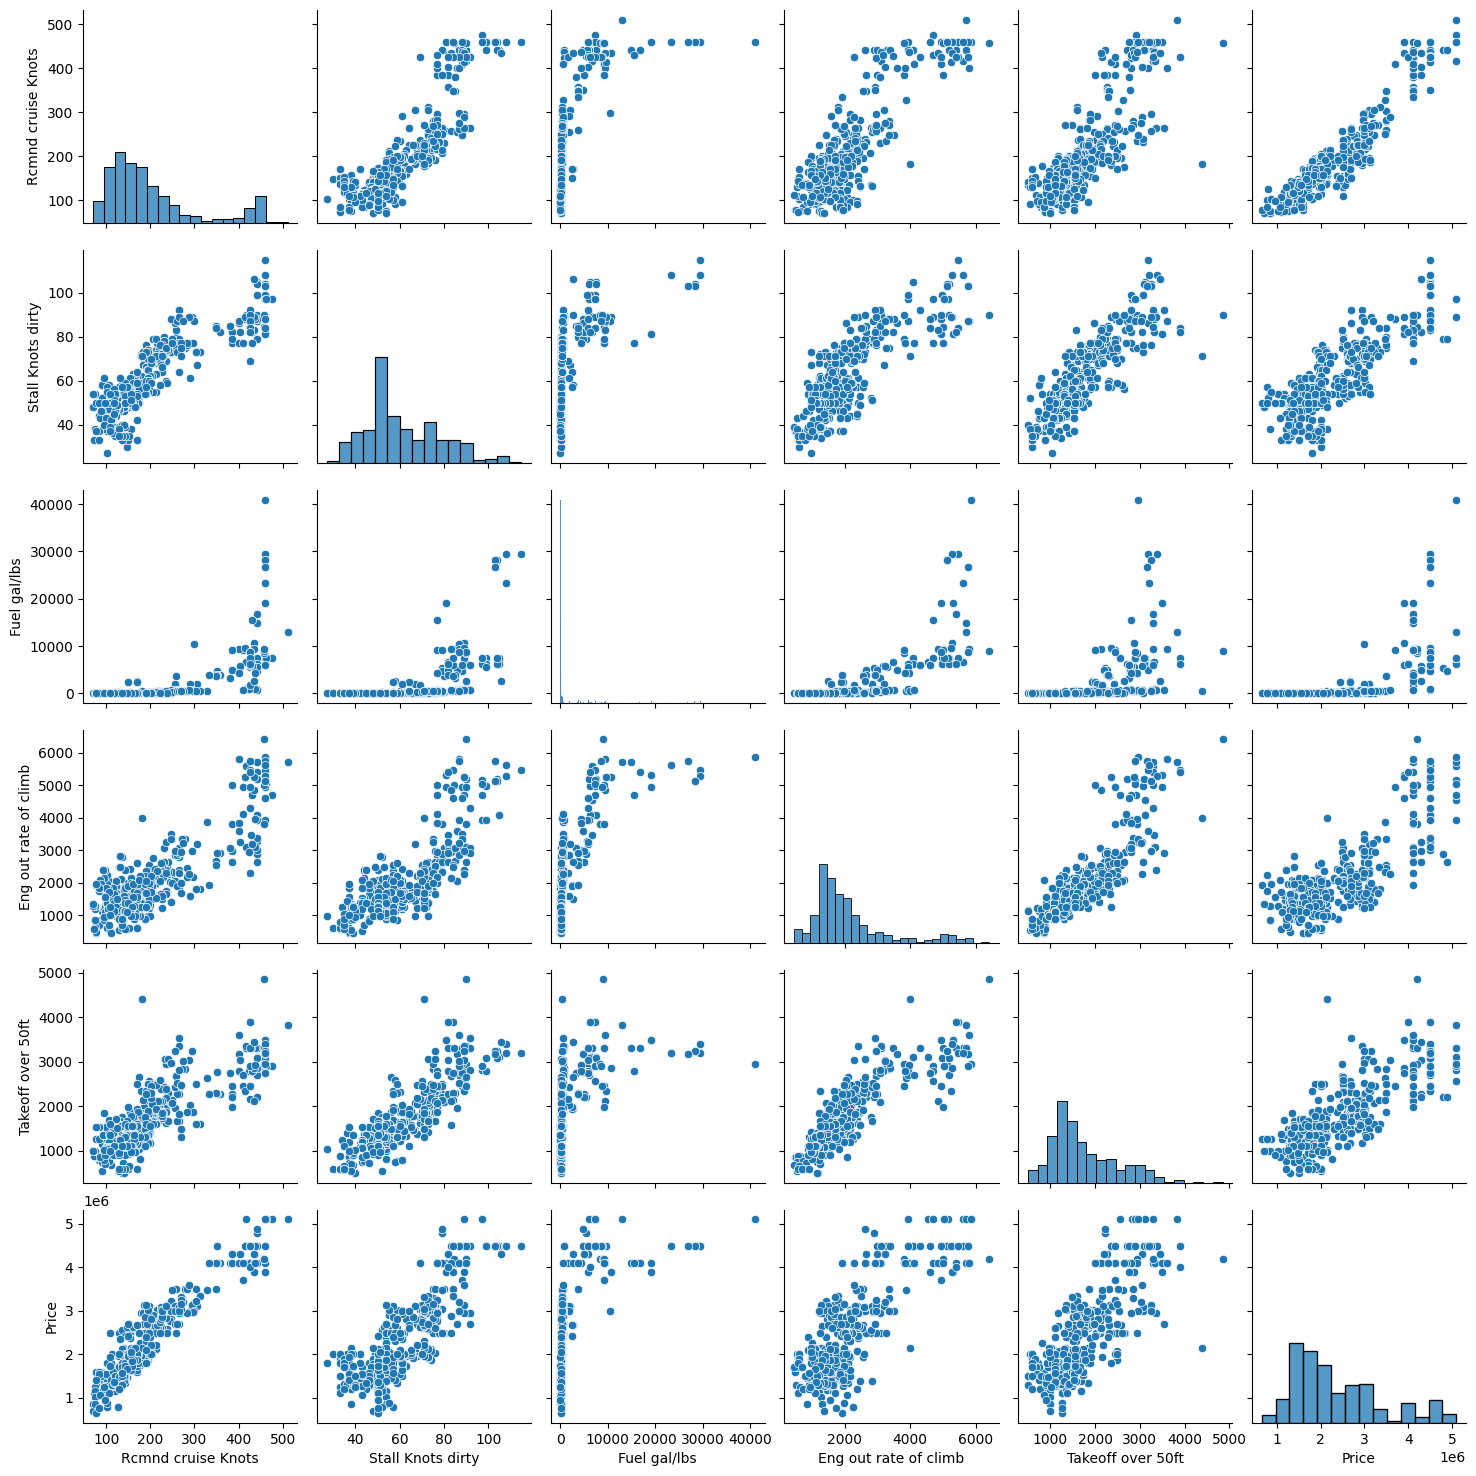

In [7]:
import seaborn as sns
sns.pairplot(plane_model)

In [8]:
new_data=plane_model.dropna(how='any')
new_data

,Model Name,Engine Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng rate of climb,Eng out rate of climb,Takeoff over 50ft,Landing over 50ft,Empty weight lbs,Length ft/in,Wing span ft/in,Range N.M.,Price
0,100 Darter (S.L. Industries),Piston,145,104,91.0,46.0,36,450,900.0,1300.0,"2,050","1,180",25/3,37/5,370,1300000.0
1,7 CCM Champ,Piston,85,89,83.0,44.0,15,600,720.0,800.0,"1,350",820,20/7,36/1,190,1230000.0
2,100 Darter (S.L. Industries),Piston,90,90,78.0,37.0,19,650,475.0,850.0,"1,300",810,21/5,35/0,210,1600000.0
3,7 AC Champ,Piston,85,88,78.0,37.0,19,620,500.0,850.0,"1,300",800,21/5,35/0,210,1300000.0
4,100 Darter (S.L. Industries),Piston,65,83,74.0,33.0,14,370,632.0,885.0,"1,220",740,21/5,35/0,175,1250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,500 U,Propjet,1200,270,265.0,64.0,402,"1,680",2300.0,1830.0,"9,920","5,732",47/3,53/3,"2,261",3000000.0
513,100 Darter (S.L. Industries),Propjet,720,312,288.0,89.0,578,"2,380",2280.0,3043.0,"11,200","6,837",43/5,47/8,"1,722",3584000.0
514,520,Propjet,720,290,275.0,87.0,390,"2,236",3230.0,3017.0,"11,200","6,389",43/5,47/8,"1,515",3200000.0
515,2180,Propjet,620,275,270.0,77.0,382,"1,750",2940.0,2446.0,"9,474","5,164",36/8,42/8,"1,336",3240000.0


define the x,y for traing the model

In [9]:
x=new_data['Rcmnd cruise Knots'].values.reshape(-1,1)
x.flatten()
x.shape

(421, 1)

In [10]:
y=new_data['Price'].values.reshape(-1,1)
y.flatten()
y.shape

(421, 1)

spliting dataset into train and test set

In [11]:
from sklearn.model_selection import train_test_split, GridSearchCV
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3, random_state=42)

In [12]:
#model traing
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
ridge=Ridge()
param_grid={'alpha':[0.001,0.01,0.1, 1.0, 10.0]}
grid_search= GridSearchCV(ridge,param_grid,cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]})

In [13]:
grid_search.best_params_

{'alpha': 10.0}

In [14]:
#prediction on train set
y_pred=grid_search.predict(x_train)
y_pred.flatten(),y_train.flatten()

(array([4504777.12770721, 2055124.06726036, 1693551.65981434,
        1973770.27558501, 1350057.87274061, 1792984.07186199,
        4504777.12770721, 4685563.33143022, 1874337.86353735,
        1422372.35422981, 2272067.51172798, 4287833.68323959,
        1621237.17832513, 2091281.30800497, 2272067.51172798,
        2281106.82191413, 3076566.11829539, 2253988.89135568,
        2244949.58116953, 2534207.50712635, 2452853.715451  ,
        2281106.82191413, 2299185.44228643, 1567001.31720823,
        1811062.69223429, 1268704.08106525, 1765866.14130354,
        4649406.09068562, 1738748.21074509, 3185037.8405292 ,
        1693551.65981434, 1802023.38204814, 4224558.51193653,
        2977133.70624774, 4504777.12770721, 1594119.24776668,
        2362460.61358949, 1702590.97000049, 1548922.69683592,
        2244949.58116953, 2091281.30800497, 4450541.2665903 ,
        2018966.82651576, 2597482.67842941, 1458529.59497442,
        1603158.55795283, 2778268.88215242, 4513816.43789336,
        

In [15]:
# Data Visualization on train set

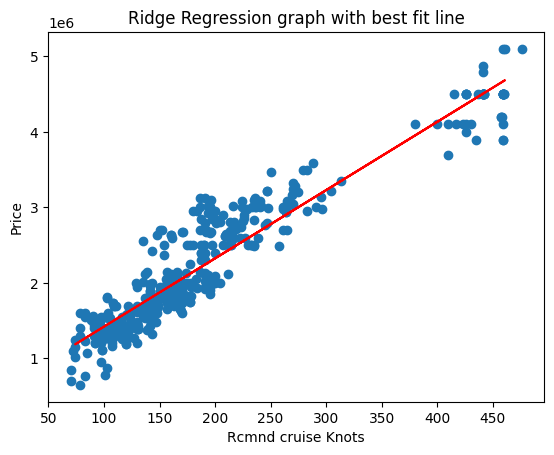

In [16]:
#best fit line using ridge reg
plt.scatter(x,y)
plt.plot(x_train,y_pred,color='red')
plt.xlabel('Rcmnd cruise Knots')
plt.ylabel('Price')
plt.title('Ridge Regression graph with best fit line')
plt.show()

In [17]:
#accuracy of the model
score=r2_score(y_train,y_pred)
print("Accuracy of the model: ",score*100)

Accuracy of the model:  89.52506553075787


In [18]:
score1=grid_search.score(x_train,y_train)
print(score1*100)

89.52506553075787


### This regression penalises the overfitting data and produced a accuracy of 89.5%